In [120]:
import numpy as np
import pandas as pd

In [121]:
'''''
data = stockname 
data_ = from year 2000 onwards

List of functions:

process_csv(data)
get_ticks(data)
plot_graph(data)
reset_index_from_year2000(data)

get_sma(data_, days)
get_ema(data_, days)
get_ewm_rsi(data_, days=14)
add_TA_features(data_)

prepare_features_and_label(processed_data) -- processed data is the data returnt from add_TA_features
create_window()
label_data()

row_generator()
create_split()

'''''

"''\ndata = stockname \ndata_ = from year 2000 onwards\n\nList of functions:\n\nprocess_csv(data)\nget_ticks(data)\nplot_graph(data)\nreset_index_from_year2000(data)\n\nget_sma(data_, days)\nget_ema(data_, days)\nget_ewm_rsi(data_, days=14)\nadd_TA_features(data_)\n\nprepare_features_and_label(processed_data) -- processed data is the data returnt from add_TA_features\ncreate_window()\nlabel_data()\n\nrow_generator()\ncreate_split()\n\n"

In [122]:
#bp = pd.read_csv('data/BP.csv')
#bp

bp = pd.read_csv('data/BP.csv', parse_dates=['Date'], dayfirst=True)
bp['Date'] = pd.to_datetime(bp['Date']).dt.strftime('%Y-%m-%d')
bp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.000000,0.716684,0.706999,0.706999,0.050272,77440
1,1962-01-03,0.000000,0.716684,0.710227,0.716684,0.050961,85184
2,1962-01-04,0.000000,0.718298,0.703771,0.703771,0.050042,100672
3,1962-01-05,0.000000,0.703771,0.677944,0.684401,0.048665,147136
4,1962-01-08,0.000000,0.703771,0.694086,0.697314,0.049583,92928
...,...,...,...,...,...,...,...
15548,2023-10-09,38.189999,38.430000,37.970001,38.380001,38.380001,9959100
15549,2023-10-10,38.419998,38.799999,38.310001,38.619999,38.619999,8930600
15550,2023-10-11,38.799999,38.910000,38.299999,38.650002,38.650002,7900500
15551,2023-10-12,39.430000,39.490002,38.919998,39.290001,39.290001,15540100


In [123]:
bp_np = bp.to_numpy()
#bp_np[0:3][1][-1] #gives us the volume of the 2nd date in the array
print(bp_np[0:1,4]) #first value in the 5th column of bp_np which is the 'Close' column
print(bp_np.shape[0])
bp_np

[0.706999]
15553


array([['1962-01-02', 0.0, 0.716684, ..., 0.706999, 0.050272, 77440],
       ['1962-01-03', 0.0, 0.716684, ..., 0.716684, 0.050961, 85184],
       ['1962-01-04', 0.0, 0.718298, ..., 0.703771, 0.050042, 100672],
       ...,
       ['2023-10-11', 38.799999, 38.91, ..., 38.650002, 38.650002,
        7900500],
       ['2023-10-12', 39.43, 39.490002, ..., 39.290001, 39.290001,
        15540100],
       ['2023-10-13', 40.0, 40.169998, ..., 40.009998, 40.009998,
        13412100]], dtype=object)

In [124]:
def get_sma(data, sma_days):
    data = data['Close']
    sma_data = []
    counter = []
    for i in range(1, data.shape[0]+1):
        if i < sma_days:
            sma = np.mean(data[0:i]) #the 2nd value in the slice is exclusive. so if we start i at 0, [0:0,4] gives us []
            sma_data.append(sma)
            counter.append(i)
        else:
            sma = sum(data[i-sma_days:i])/sma_days
            sma_data.append(sma)
            counter.append(i)

    #print(sma_data[-1])   
    return sma_data
   
#get_sma(bp, 10)

In [125]:
bp['Close'].isnull().values.any()
#checks if there is any missing values in the 'Close' column of the stock variable data

False

In [126]:
bp['Date'].to_numpy().shape
#give you a tuple containing the dimensions (shape) of the NumPy array derived from the 'Date' 
#column in the stock DataFrame. 

(15553,)

/tmp/ipykernel_2581/1450811611.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(get_ticks(data), rotation=45) #sets the labels we got earlier from xticks and rotate them 45 degrees for better readability


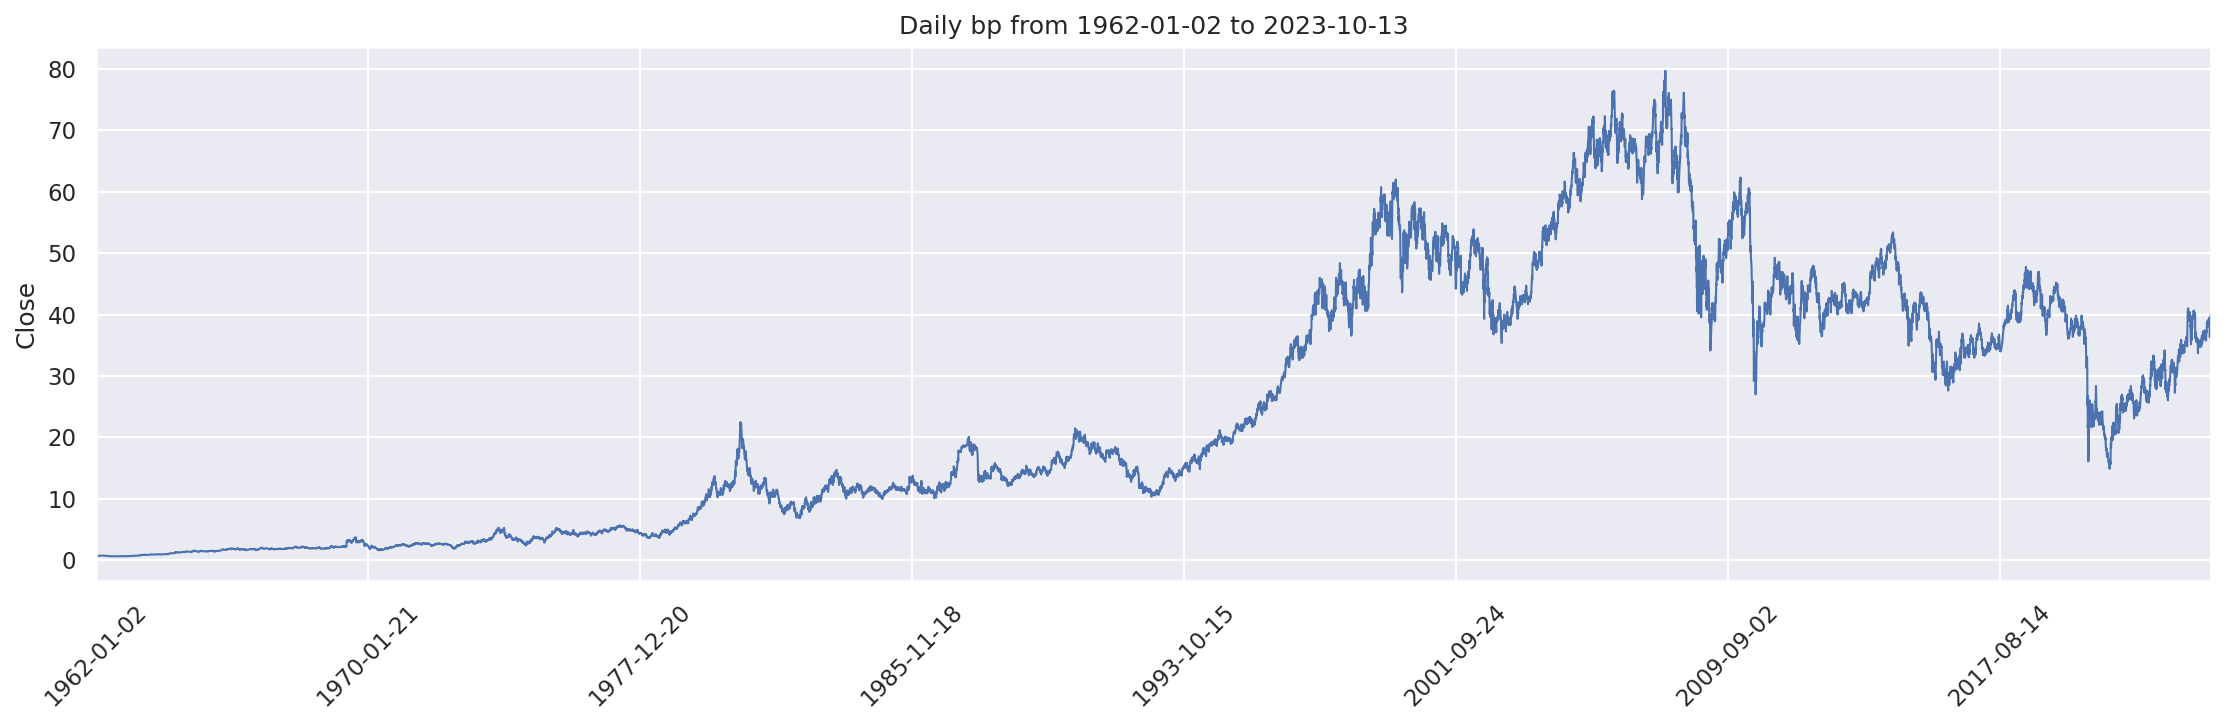

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_ticks(data):
    xticks = []
    for i in range(0, data['Date'].to_numpy().shape[0], 2000): #retrieves the number of elements in the 'Date' column, and then generates a range through it with a step of 2000
        xticks.append(data['Date'].to_numpy()[i]) #appends the 'Date' value at index i (every 2000th step) to the xticks []
    xticks.append(data['Date'].to_numpy()[-1]) #after the loop is complete, appends the last 'Date' value
    return xticks #prints out our now filled xticks

def plot_graph(data):
    plt.figure(figsize=(15,5), dpi=150) #size of plot and dots
    sns.set_theme(style='darkgrid')
    fig = sns.lineplot(data=bp['Close'], linewidth=1) #plots the 'Close' column from the 'bp' dataset and assigns the returnt plot to the variable fig
    stock_name = [name for name, var in globals().items() if var is bp][0]
    start_date = data['Date'][0]
    end_date = data['Date'][data.shape[0]-1]
    number_of_indexes =  data.shape[0] + 1
    title_of_graph = 'Daily {stockData} from {startDate} to {endDate}'.format(stockData = stock_name , startDate = start_date, endDate = end_date)
    fig.set_title(title_of_graph)
    fig.set_xlim(0,number_of_indexes) #sets limit of x-axis from 0 to 15422
    fig.set_xticklabels(get_ticks(data), rotation=45) #sets the labels we got earlier from xticks and rotate them 45 degrees for better readability
    # plt.plot(bp['Close'], label='Close')
    # plt.title('Daily BP from 1962-01-03 to 2023-04-06')
    # plt.legend()

    plt.tight_layout() #adjusts layout of plot to prevent overlapping elements to improve overall appearance 

plot_graph(bp)

In [128]:
bp_selected_index = bp.loc[bp['Date'] == '2000-01-03'].index[0] #filters the dataframe based on the condition where the column where 'Date' equals that date. [0] to get the first index from the resulting label indexes
bp_selected_index

9569

In [129]:
def reset_index_from_year2000(data):
    data_selected_index = data.loc[data['Date'] == '2000-01-03'].index[0]
    data_ = data.iloc[data_selected_index:].reset_index() 
    return data_#selects row from dataframe 'stock' from selected_index (9568) to last index. reset.index() then resets the index of the newly created dataframe stock so it starts from 0. By default the old index values will be moved to a new column called 'index' as shown below 

bp_ = reset_index_from_year2000(bp) #as seen below, this creates a new index, where the new 0 is our old selected_index
bp_

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,9569,2000-01-03,59.250000,59.312500,58.500000,58.812500,19.408945,2039300
1,9570,2000-01-04,58.437500,59.437500,58.250000,58.500000,19.305817,3825800
2,9571,2000-01-05,57.937500,60.500000,57.750000,60.500000,19.965843,4055900
3,9572,2000-01-06,59.687500,60.625000,59.312500,60.625000,20.007080,4034700
4,9573,2000-01-07,58.500000,59.500000,58.500000,59.500000,19.635830,4027200
...,...,...,...,...,...,...,...,...
5979,15548,2023-10-09,38.189999,38.430000,37.970001,38.380001,38.380001,9959100
5980,15549,2023-10-10,38.419998,38.799999,38.310001,38.619999,38.619999,8930600
5981,15550,2023-10-11,38.799999,38.910000,38.299999,38.650002,38.650002,7900500
5982,15551,2023-10-12,39.430000,39.490002,38.919998,39.290001,39.290001,15540100


In [130]:
bp_sma10_values = get_sma(bp_, 10)
bp_sma20_values = get_sma(bp_, 20)
bp_sma50_values = get_sma(bp_, 50)

In [131]:
bp_pd_features = bp_[['Date', 'Volume', 'Open', 'High', 'Low', 'Close']] #Create a new DataFrame named bp_pd_features by selecting specific columns ('Date', 'Open', 'High', 'Low', 'Close') from the DataFrame 'bp_'
bp_pd_features.insert(1, 'SMA50', bp_sma50_values)
bp_pd_features.insert(1, 'SMA20', bp_sma20_values)
bp_pd_features

,Date,SMA20,SMA50,Volume,Open,High,Low,Close
0,2000-01-03,58.812500,58.812500,2039300,59.250000,59.312500,58.500000,58.812500
1,2000-01-04,58.656250,58.656250,3825800,58.437500,59.437500,58.250000,58.500000
2,2000-01-05,59.270833,59.270833,4055900,57.937500,60.500000,57.750000,60.500000
3,2000-01-06,59.609375,59.609375,4034700,59.687500,60.625000,59.312500,60.625000
4,2000-01-07,59.587500,59.587500,4027200,58.500000,59.500000,58.500000,59.500000
...,...,...,...,...,...,...,...,...
5979,2023-10-09,38.278500,37.518600,9959100,38.189999,38.430000,37.970001,38.380001
5980,2023-10-10,38.304500,37.545000,8930600,38.419998,38.799999,38.310001,38.619999
5981,2023-10-11,38.324000,37.578800,7900500,38.799999,38.910000,38.299999,38.650002
5982,2023-10-12,38.333500,37.644000,15540100,39.430000,39.490002,38.919998,39.290001


In [132]:
import pandas as pd

def get_ema(data, ema_days):
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input 'data' should be a Pandas DataFrame.")
    
    # Ensure 'Close' column exists in the input DataFrame
    if 'Close' not in data.columns:
        raise ValueError("DataFrame 'data' must contain a 'Close' column.")
    
    result = data['Close'].ewm(span=ema_days, min_periods=0).mean()
    return result

# Example usage:
# Replace 'stock_' with your actual DataFrame variable name
ema_values = get_ema(bp_, 12)
ema_values

0       58.812500
1       58.643229
2       59.367927
3       59.764736
4       59.692808
          ...    
5979    37.858596
5980    37.975735
5981    38.079469
5982    38.265704
5983    38.534057
Name: Close, Length: 5984, dtype: float64

In [133]:
ema12_values = get_ema(bp_, 12)
ema26_values = get_ema(bp_, 26)

In [134]:
 #       if 'EMA26' not in pd_features.columns:
  #          pd_features.insert(1, 'EMA26', ema26_values)
   #     else:
    #        pd_features['EMA26'] = ema26_values

 #       if 'EMA12' not in pd_features.columns:
  #          pd_features.insert(1, 'EMA12', ema12_values)
   #     else:
    #        pd_features['EMA12'] = ema12_values

#pd_features

In [135]:
bp_pd_featuresEMA = bp_pd_features[['Date', 'SMA20', 'SMA50', 'Volume', 'Open', 'High', 'Low', 'Close']]
bp_pd_featuresEMA.insert(1, 'EMA26', ema26_values)
bp_pd_featuresEMA.insert(1, 'EMA12', ema12_values)
bp_pd_featuresEMA

,Date,EMA12,EMA26,SMA20,SMA50,Volume,Open,High,Low,Close
0,2000-01-03,58.812500,58.812500,58.812500,58.812500,2039300,59.250000,59.312500,58.500000,58.812500
1,2000-01-04,58.643229,58.650240,58.656250,58.656250,3825800,58.437500,59.437500,58.250000,58.500000
2,2000-01-05,59.367927,59.314841,59.270833,59.270833,4055900,57.937500,60.500000,57.750000,60.500000
3,2000-01-06,59.764736,59.681104,59.609375,59.609375,4034700,59.687500,60.625000,59.312500,60.625000
4,2000-01-07,59.692808,59.639105,59.587500,59.587500,4027200,58.500000,59.500000,58.500000,59.500000
...,...,...,...,...,...,...,...,...,...,...
5979,2023-10-09,37.858596,37.909573,38.278500,37.518600,9959100,38.189999,38.430000,37.970001,38.380001
5980,2023-10-10,37.975735,37.962197,38.304500,37.545000,8930600,38.419998,38.799999,38.310001,38.619999
5981,2023-10-11,38.079469,38.013145,38.324000,37.578800,7900500,38.799999,38.910000,38.299999,38.650002
5982,2023-10-12,38.265704,38.107727,38.333500,37.644000,15540100,39.430000,39.490002,38.919998,39.290001


In [136]:
bp_pd_close = bp_[['Date', 'Close']]
bp_just_close_data = bp_pd_close['Close']
bp_pd_close
# selects just the 'Date' and 'Close' columns 

,Date,Close
0,2000-01-03,58.812500
1,2000-01-04,58.500000
2,2000-01-05,60.500000
3,2000-01-06,60.625000
4,2000-01-07,59.500000
...,...,...
5979,2023-10-09,38.380001
5980,2023-10-10,38.619999
5981,2023-10-11,38.650002
5982,2023-10-12,39.290001


TESTING RSI

In [137]:
bp_recent_close_prices = [
    34.85, 35.29, 35.59, 35.98, 36.29, 36.07, 35.94, 35.94, 35.82, 35.27, 
    35.74, 35.88, 35.61, 35.02, 35.59, 35.85, 35.70, 35.08, 34.68, 34.90, 
    35.47, 36.30, 35.75, 36.40, 35.64, 36.58, 38.35, 38.16, 38.82, 39.06, 
    38.79
]

# Converting to a NumPy array
#print(close_prices_array)

close_prices_reversed = bp_recent_close_prices[::-1]
close_prices_array_reversed = np.array(close_prices_reversed)
print(close_prices_array_reversed)



[38.79 39.06 38.82 38.16 38.35 36.58 35.64 36.4  35.75 36.3  35.47 34.9
 34.68 35.08 35.7  35.85 35.59 35.02 35.61 35.88 35.74 35.27 35.82 35.94
 35.94 36.07 36.29 35.98 35.59 35.29 34.85]


In [138]:
import pandas as pd

def get_simple_rsi(dataset, period=14):
    if not isinstance(dataset, pd.DataFrame):
        dataset = pd.Series(dataset)
    period = 14
    close_delta = dataset.diff()
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)

    AvgU = up.rolling(window = period).mean()
    AvgD = down.rolling(window = period).mean()

    rs = AvgU / AvgD
    rsi_simple = 100 - (100/(1 + rs))
    rsi_simple_np = np.array(rsi_simple)
    
    return rsi_simple_np

    
#get_simple_rsi(close_prices_reversed, 14)


In [139]:
import pandas as pd
import numpy as np

def get_ewm_rsi(dataset, period=14):
        if not isinstance(dataset, pd.DataFrame):
                dataset = pd.Series(dataset)
        dataset = dataset['Close']
        close_delta = dataset.diff()
        up = close_delta.clip(lower=0)
        down = -1 * close_delta.clip(upper=0)
        up_ewm = up.ewm(com = period-1, min_periods = period).mean()
        down_ewm = down.ewm(com = period-1, min_periods = period).mean()

        rs_ewm = up_ewm / down_ewm
        rsi_ewm = 100 - (100/(1 + rs_ewm))
        rsi_ewm_np = np.array(rsi_ewm)

        return rsi_ewm_np

#get_ewm_rsi(close_prices_reversed, 14)

In [140]:
bp_rsi14_ewm_values = get_ewm_rsi(bp_, 14)
bp_rsi14_ewm_values

array([        nan,         nan,         nan, ..., 55.49149756,
       59.83909106, 64.08891161])

In [141]:
bp_pd_featuresEMA_RSI = bp_pd_featuresEMA[['Date', 'EMA12', 'EMA26', 'SMA20', 'SMA50', 'Volume', 'Open', 'High', 'Low', 'Close']]
bp_pd_featuresEMA_RSI.insert(1, 'RSI14', bp_rsi14_ewm_values)
bp_pd_featuresEMA_RSI

,Date,RSI14,EMA12,EMA26,SMA20,SMA50,Volume,Open,High,Low,Close
0,2000-01-03,NaN,58.812500,58.812500,58.812500,58.812500,2039300,59.250000,59.312500,58.500000,58.812500
1,2000-01-04,NaN,58.643229,58.650240,58.656250,58.656250,3825800,58.437500,59.437500,58.250000,58.500000
2,2000-01-05,NaN,59.367927,59.314841,59.270833,59.270833,4055900,57.937500,60.500000,57.750000,60.500000
3,2000-01-06,NaN,59.764736,59.681104,59.609375,59.609375,4034700,59.687500,60.625000,59.312500,60.625000
4,2000-01-07,NaN,59.692808,59.639105,59.587500,59.587500,4027200,58.500000,59.500000,58.500000,59.500000
...,...,...,...,...,...,...,...,...,...,...,...
5979,2023-10-09,53.650719,37.858596,37.909573,38.278500,37.518600,9959100,38.189999,38.430000,37.970001,38.380001
5980,2023-10-10,55.280761,37.975735,37.962197,38.304500,37.545000,8930600,38.419998,38.799999,38.310001,38.619999
5981,2023-10-11,55.491498,38.079469,38.013145,38.324000,37.578800,7900500,38.799999,38.910000,38.299999,38.650002
5982,2023-10-12,59.839091,38.265704,38.107727,38.333500,37.644000,15540100,39.430000,39.490002,38.919998,39.290001


END OF RSI TEST^

RSI using EWM seems more accurate

ADDING OF NASDAQ
-Just change the name of 'nasdaq' or 'nasdaq_' with the new stock name for future stocks

In [142]:
nasdaq = pd.read_csv('data/^IXIC.csv', parse_dates=['Date'], dayfirst=True)
nasdaq['Date'] = pd.to_datetime(nasdaq['Date']).dt.strftime('%Y-%m-%d')
nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...,...
13283,2023-10-09,13326.219730,13509.299810,13277.480470,13484.240230,13484.240230,3835930000
13284,2023-10-10,13505.809570,13659.629880,13491.809570,13562.839840,13562.839840,4301350000
13285,2023-10-11,13619.209960,13671.110350,13549.290040,13659.679690,13659.679690,4160440000
13286,2023-10-12,13672.469730,13714.139650,13491.559570,13574.219730,13574.219730,4858620000


In [143]:
nasdaq_np = nasdaq.to_numpy()
nasdaq_np


array([['1971-02-05', 100.0, 100.0, ..., 100.0, 100.0, 0],
       ['1971-02-08', 100.839996, 100.839996, ..., 100.839996,
        100.839996, 0],
       ['1971-02-09', 100.760002, 100.760002, ..., 100.760002,
        100.760002, 0],
       ...,
       ['2023-10-11', 13619.20996, 13671.11035, ..., 13659.67969,
        13659.67969, 4160440000],
       ['2023-10-12', 13672.46973, 13714.13965, ..., 13574.21973,
        13574.21973, 4858620000],
       ['2023-10-13', 13613.58984, 13619.54004, ..., 13407.23047,
        13407.23047, 4251550000]], dtype=object)

In [144]:
nasdaq['Close'].isnull().values.any()
nasdaq['Date'].to_numpy().shape
xticks = []
for i in range(0, nasdaq['Date'].to_numpy().shape[0], 2000): #retrieves the number of elements in the 'Date' column, and then generates a range through it with a step of 2000
    xticks.append(nasdaq['Date'].to_numpy()[i]) #appends the 'Date' value at index i (every 2000th step) to the xticks []
xticks.append(nasdaq['Date'].to_numpy()[-1]) #after the loop is complete, appends the last 'Date' value
xticks #prints out our now filled xticks


['1971-02-05',
 '1979-01-09',
 '1986-12-05',
 '1994-11-02',
 '2002-10-11',
 '2010-09-22',
 '2018-08-31',
 '2023-10-13']

/tmp/ipykernel_2581/1474230133.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xticks, rotation=45) #sets the labels we got earlier from xticks and rotate them 45 degrees for better readability


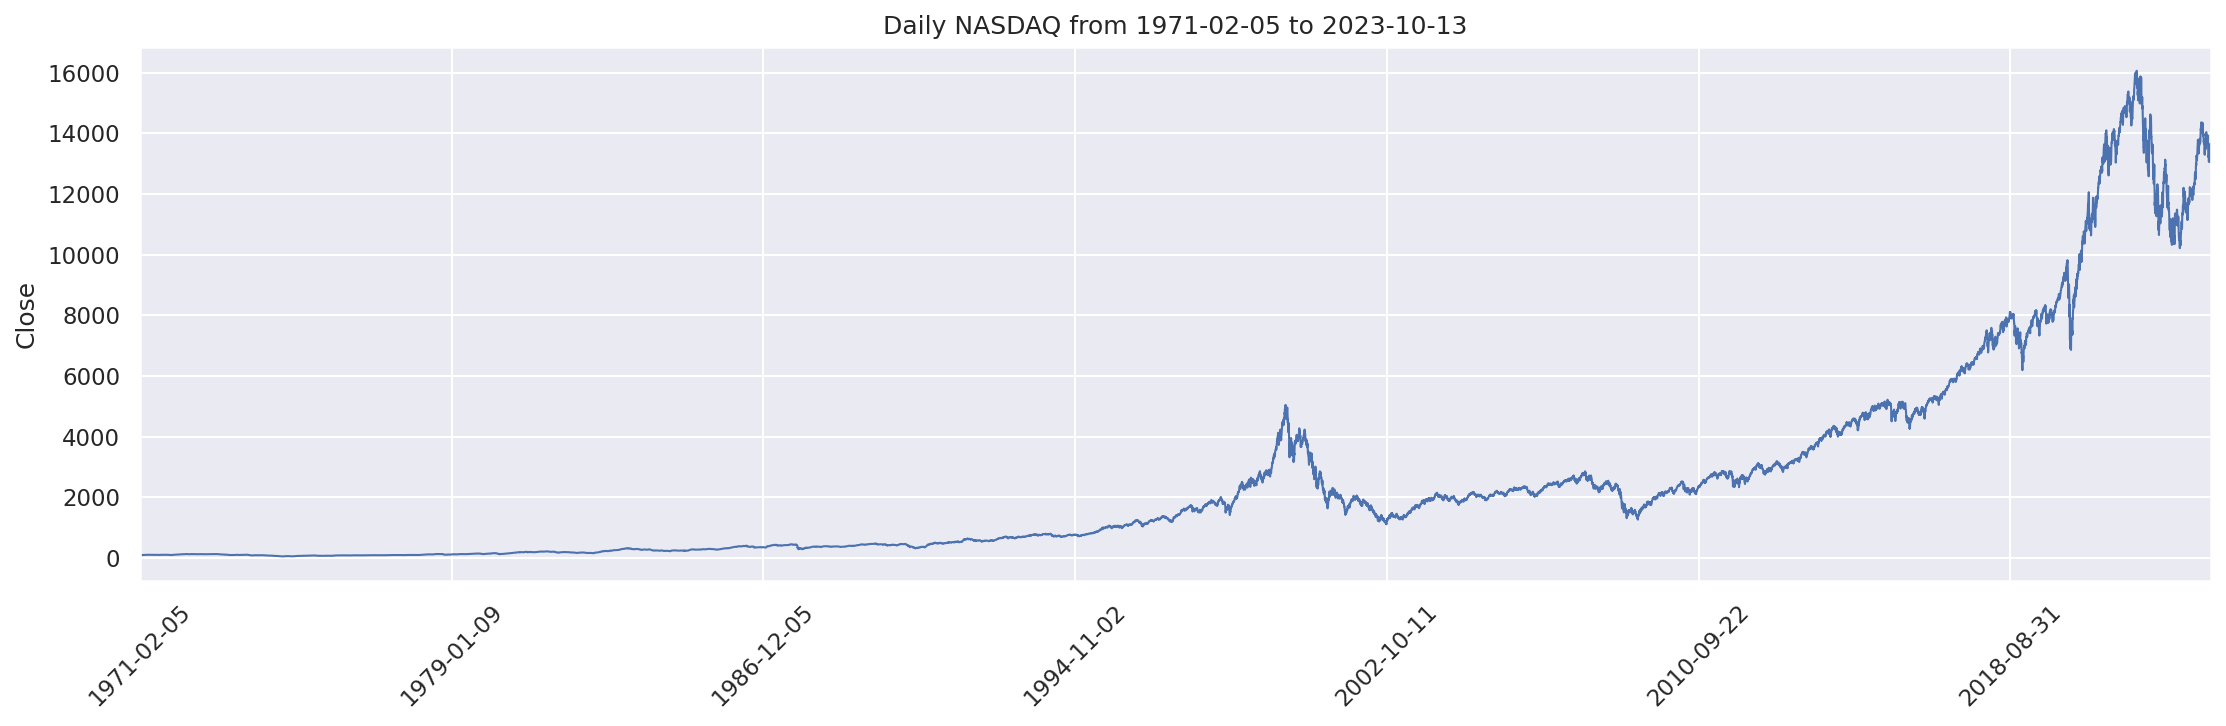

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,5), dpi=150) #size of plot and dots
sns.set_theme(style='darkgrid')
fig = sns.lineplot(data=nasdaq['Close'], linewidth=1) #plots the 'Close' column from the 'nasdaq' dataset and assigns the returnt plot to the variable fig
fig.set_title('Daily NASDAQ from 1971-02-05 to 2023-10-13')
fig.set_xlim(0,13288) #sets limit of x-axis from 0 to 15422
fig.set_xticklabels(xticks, rotation=45) #sets the labels we got earlier from xticks and rotate them 45 degrees for better readability
# plt.plot(nasdaq['Close'], label='Close')
# plt.title('Daily BP from 1962-01-03 to 2023-04-06')
# plt.legend()
plt.tight_layout() #adjusts layout of plot to prevent overlapping elements to improve overall appearance 

In [146]:
nasdaq_selected_index = nasdaq.loc[nasdaq['Date'] == '2000-01-03'].index[0] #filters the dataframe based on the condition where the column where 'Date' equals that date. [0] to get the first index from the resulting label indexes
nasdaq_selected_index

7304

In [147]:
nasdaq_ = nasdaq.iloc[nasdaq_selected_index:].reset_index() #selects row from dataframe 'stock' from selected_index (9568) to last index. reset.index() then resets the index of the newly created dataframe stock so it starts from 0. By default the old index values will be moved to a new column called 'index' as shown below 
nasdaq_ #as seen below, this creates a new index, where the new 0 is our old selected_index

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,7304,2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
1,7305,2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2,7306,2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
3,7307,2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
4,7308,2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000
...,...,...,...,...,...,...,...,...
5979,13283,2023-10-09,13326.219730,13509.299810,13277.480470,13484.240230,13484.240230,3835930000
5980,13284,2023-10-10,13505.809570,13659.629880,13491.809570,13562.839840,13562.839840,4301350000
5981,13285,2023-10-11,13619.209960,13671.110350,13549.290040,13659.679690,13659.679690,4160440000
5982,13286,2023-10-12,13672.469730,13714.139650,13491.559570,13574.219730,13574.219730,4858620000


In [148]:
#just change all instance of 'nasdaq_' in name for future stocks

nasdaq_pd_close = nasdaq_[['Date', 'Close']]
nasdaq_just_close_data = nasdaq_pd_close['Close']

In [149]:
#just change all instance of 'nasdaq_' in name for future stocks

nasdaq_sma20_values = get_sma(nasdaq_, 20)
nasdaq_sma50_values = get_sma(nasdaq_, 50)
nasdaq_ema12_values = get_ema(nasdaq_, 12)
nasdaq_ema26_values = get_ema(nasdaq_, 26)
nasdaq_rsi14_ewm_values = get_ewm_rsi(nasdaq_, 14)

In [150]:
#just change all instance of 'nasdaq_' in name for future stocks

def add_TA_features(data):
    data_sma20_values = get_sma(data, 20)
    data_sma50_values = get_sma(data, 50)
    data_ema12_values = get_ema(data, 12)
    data_ema26_values = get_ema(data, 26)
    data_rsi14_ewm_values = get_ewm_rsi(data, 14)

    featuresSMA = data[['Date', 'Volume', 'Open', 'High', 'Low', 'Close']]
    featuresSMA.insert(1, 'SMA50', data_sma50_values)
    featuresSMA.insert(1, 'SMA20', data_sma20_values)

    data_pd_features = data[['Date', 'Volume', 'Open', 'High', 'Low', 'Close']]
    data_pd_features.insert(1, 'SMA50', data_sma50_values)
    data_pd_features.insert(1, 'SMA20', data_sma20_values)

    data_pd_featuresEMA = data_pd_features[['Date', 'SMA20', 'SMA50', 'Volume', 'Open', 'High', 'Low', 'Close']]
    data_pd_featuresEMA.insert(1, 'EMA26', data_ema26_values)
    data_pd_featuresEMA.insert(1, 'EMA12', data_ema12_values)

    data_pd_featuresEMA_RSI = data_pd_featuresEMA[['Date', 'EMA12', 'EMA26', 'SMA20', 'SMA50', 'Volume', 'Open', 'High', 'Low', 'Close']]
    data_pd_featuresEMA_RSI.insert(1, 'RSI14', data_rsi14_ewm_values)

    return data_pd_featuresEMA_RSI

nasdaq_pd_featuresEMA_RSI = add_TA_features(nasdaq_)
nasdaq_pd_featuresEMA_RSI

,Date,RSI14,EMA12,EMA26,SMA20,SMA50,Volume,Open,High,Low,Close
0,2000-01-03,NaN,4131.149902,4131.149902,4131.149902,4131.149902,1510070000,4186.189941,4192.189941,3989.709961,4131.149902
1,2000-01-04,NaN,4006.859090,4012.007230,4016.419921,4016.419921,1511840000,4020.000000,4073.250000,3898.229980,3901.689941
2,2000-01-05,NaN,3956.385834,3963.694474,3970.126627,3970.126627,1735670000,3854.350098,3924.209961,3734.870117,3877.540039
3,2000-01-06,NaN,3884.018690,3897.561352,3909.377441,3909.377441,1598320000,3834.439941,3868.760010,3715.620117,3727.129883
4,2000-01-07,NaN,3883.638703,3894.096418,3904.025976,3904.025976,1634930000,3711.090088,3882.669922,3711.090088,3882.620117
...,...,...,...,...,...,...,...,...,...,...,...
5979,2023-10-09,51.242301,13331.508120,13441.564988,13405.098535,13637.907383,3835930000,13326.219730,13509.299810,13277.480470,13484.240230
5980,2023-10-10,53.759661,13367.097615,13450.548310,13394.560009,13622.243789,4301350000,13505.809570,13659.629880,13491.809570,13562.839840
5981,2023-10-11,56.724255,13412.110242,13466.039524,13386.864502,13609.759180,4160440000,13619.209960,13671.110350,13549.290040,13659.679690
5982,2023-10-12,53.466495,13437.050163,13474.052872,13369.272998,13601.774570,4858620000,13672.469730,13714.139650,13491.559570,13574.219730


COMPLETION OF NASDAQ PROCESSING

In [151]:
#for BP

bp_feature_array = bp_pd_featuresEMA_RSI.values #pd_features.values converts the Pandas DataFrame pd_features into a NumPy array and assigns it to the variable feature_array.
print(bp_feature_array) #this array has ('Date', 'Open', 'High', 'Low', 'Close')
print(bp_feature_array.shape)
#print(bp_feature_array.shape) #displays the dimension of the array
print('')
bp_close_array = bp_pd_close.values #pd_close.values converts the Pandas DataFrame pd_close into a NumPy array and assigns it to the variable bp_close_array.
print(bp_close_array) #this array has ('Date', 'Close')
#print(bp_close_array.shape)

[['2000-01-03' nan 58.8125 ... 59.3125 58.5 58.8125]
 ['2000-01-04' nan 58.64322916666666 ... 59.4375 58.25 58.5]
 ['2000-01-05' nan 59.3679272517321 ... 60.5 57.75 60.5]
 ...
 ['2023-10-11' 55.491497557082305 38.07946858106749 ... 38.91 38.299999
  38.650002]
 ['2023-10-12' 59.8390910635003 38.265704337826335 ... 39.490002
  38.919998 39.290001]
 ['2023-10-13' 64.08891161228141 38.53405720892997 ... 40.169998
  39.700001 40.009998]]
(5984, 11)

[['2000-01-03' 58.8125]
 ['2000-01-04' 58.5]
 ['2000-01-05' 60.5]
 ...
 ['2023-10-11' 38.650002]
 ['2023-10-12' 39.290001]
 ['2023-10-13' 40.009998]]


In [152]:
#for NASDAQ

def prepare_features_and_label(processed_data):
    feature_array = processed_data.values
    label_array = processed_data[['Date', 'Close']]
    label_array = label_array.values

    return feature_array, label_array
    
#nasdaq_feature_array = nasdaq_pd_featuresEMA_RSI.values #pd_features.values converts the Pandas DataFrame pd_features into a NumPy array and assigns it to the variable feature_array.
#nasdaq_close_array = nasdaq_pd_close.values #pd_close.values converts the Pandas DataFrame pd_close into a NumPy array and assigns it to the variable close_array.

#print(nasdaq_feature_array)
#print(nasdaq_feature_array.shape)
#print(nasdaq_close_array)
#print(nasdaq_close_array.shape)
#print('')

nasdaq_feature_array, nasdaq_close_array = prepare_features_and_label(nasdaq_pd_featuresEMA_RSI)
print(nasdaq_feature_array)
print(nasdaq_feature_array.shape)
print('')
print(nasdaq_close_array)

[['2000-01-03' nan 4131.149902 ... 4192.189941 3989.709961 4131.149902]
 ['2000-01-04' nan 4006.8590897916665 ... 4073.25 3898.22998 3901.689941]
 ['2000-01-05' nan 3956.385834401847 ... 3924.209961 3734.870117
  3877.540039]
 ...
 ['2023-10-11' 56.72425456260743 13412.11024202343 ... 13671.11035
  13549.29004 13659.67969]
 ['2023-10-12' 53.46649457219579 13437.050163250595 ... 13714.13965
  13491.55957 13574.21973]
 ['2023-10-13' 47.701571538659486 13432.462518135118 ... 13619.54004
  13361.84961 13407.23047]]
(5984, 11)

[['2000-01-03' 4131.149902]
 ['2000-01-04' 3901.689941]
 ['2000-01-05' 3877.540039]
 ...
 ['2023-10-11' 13659.67969]
 ['2023-10-12' 13574.21973]
 ['2023-10-13' 13407.23047]]


FUNCTION FOR CREATING SLIDING WINDOW

In [153]:
# in this case, feature is same as target
def create_window(target, feature, input_window=60, output_window=5, offset=0): 
    #target - output or what we want to predict
    #feature - input variables used for prediction 
    #input_window - length of input sequence, here is 60 
    #output_window - length of output sequence, 5 
    #offset -  An offset value that can be used to adjust the position of the target window (defaults to 0)
    feature_new, target_new = [], [] #initialises empty lists to store the created sequences 
    print(target.shape[0])
    for i in range(input_window, target.shape[0]-offset-output_window+1): #target.shape[0] gives the no. of rows of the target array, +1 just to include the last index
        #iterates through range starting from input_window (60) to target.shape[0]-offset-output_window+1
        feature_list = feature[i-input_window:i] #first list is index(60 - 60, 60) of feature sequence since 'i' starts at 60 from the range defined above 
        feature_new.append(feature_list)
        target_list = target[i+offset:i+output_window] #Slices the target sequence from index i + offset to index i + output_window. This forms a window of length output_window from the target sequence.
        target_new.append(target_list)
    return np.array(feature_new), np.array(target_new)
#This loop essentially creates sliding windows of input-output pairs from the feature and target sequences by iterating through the data and forming sequences of specified lengths,
#which are then appended to lists (feature_new and target_new). These windows can be used for training predictive models in a machine learning context.
#So many pairs of (length(60) feature, length(5) target).

In [154]:
bp_data = create_window(target=bp_close_array, feature=bp_feature_array)
#target is the ('Date', 'Close') array
# feature is the ('Date', 'Open', 'High', 'Low', 'Close')
#bp_data, contains the created input-output pairs (windows) derived from the feature_array and close_array according to the default window sizes specified in the create_window function 
# (60 for input and 5 for output). These pairs are suitable for training a machine learning model for tasks such as sequence prediction or time series forecasting.
print('')

print(bp_data[0][-1][-1]) #bp_in -----> has a difference in date of 5 days due to the output_window
print(bp_data[0].shape)
print(bp_data[1][-1][-1]) #bp_out
print(bp_data[1].shape)

5984

['2023-10-06' 45.0483939551923 37.76379552261853 37.87193841574821
 38.2899997 37.48519981999999 10420100 36.98 37.470001 36.59 37.27]
(5920, 60, 11)
['2023-10-13' 40.009998]
(5920, 5, 2)


In [155]:
bp_in, bp_out, = bp_data
print(bp_in.shape)
print(bp_out.shape)
#no. of rows, length, dimensions (no.of features/columns)

(5920, 60, 11)
(5920, 5, 2)


In [156]:
nasdaq_data = create_window(target=nasdaq_close_array, feature=nasdaq_feature_array)

print('')

print(nasdaq_data[0][-1][-1]) 
print(nasdaq_data[0].shape)
print(nasdaq_data[1][-1][-1])
print(nasdaq_data[1].shape)

5984

['2023-10-06' 49.52496707207515 13303.738645083002 13438.150968786496
 13426.7810055 13654.5557814 4309420000 13127.67969 13472.26953
 13099.03027 13431.33984]
(5920, 60, 11)
['2023-10-13' 13407.23047]
(5920, 5, 2)


In [157]:
nasdaq_in, nasdaq_out, = nasdaq_data
print(nasdaq_in.shape)
print(nasdaq_out.shape)
#no. of rows, length, dimensions (no.of features/columns)

(5920, 60, 11)
(5920, 5, 2)


We will only be using 'nasdaq_in'

'nasdaq_out' is of no use for now. We use 'nasdaq_in' along side 'bp_in' for the training data, and 'bp_out' for the labels

In [158]:
bp_in[0][-1]
#last index in the first array of 5920 arraies, 60 units, each of dimension 11, a 60 x 11 array 

array(['2000-03-28', 42.53870578270477, 50.430705404475425,
       50.31354798510152, 50.6875, 50.4425, 2385200, 48.9375, 49.4375,
       48.0, 48.375], dtype=object)

In [159]:
nasdaq_in[-1][-1]

array(['2023-10-06', 49.52496707207515, 13303.738645083002,
       13438.150968786496, 13426.7810055, 13654.5557814, 4309420000,
       13127.67969, 13472.26953, 13099.03027, 13431.33984], dtype=object)

In [160]:
bp_out[0]
#last index of 5920 indexes, 5 x 2 array

array([['2000-03-29', 50.3125],
       ['2000-03-30', 51.9375],
       ['2000-03-31', 53.25],
       ['2000-04-03', 52.625],
       ['2000-04-04', 52.6875]], dtype=object)

In [161]:
(bp_out[-1, -1, 1] - bp_out[-1, 0, 1]) / bp_out[-1, 0, 1]
#calculates the percentage change between the last 'Close' price (bp_out[-1, -1, 1]) and the first 'Close' price (bp_out[-1, 0, 1]) in this sequence.

0.04246995720505591

In [162]:
def label_data(target, pred_days=5, gain_rate=0.2):
    labels = []
    tau = gain_rate / 252 / pred_days
    for i in range(target.shape[0]): #gives us the number of arrays in the array. an array of 5920 arrays, each being a 5x2 in the case of bp_out
        rate = (target[i, -1, 1] - target[i, 0, 1]) / target[i, 0, 1] #this just calculates the change in close price between first and last day among each array (of 5 days)
        if rate > tau:
            label = '1' # buy
        elif rate > -tau:
            label = '0' # neutral
        else:
            label = '-1'  # sell
        labels.append(label)
    return np.array(labels)



In [163]:
bp_label = label_data(bp_out)
bp_label

array(['1', '-1', '-1', ..., '1', '1', '1'], dtype='<U2')

In [164]:
print('bp_out[0]')
print(bp_out[0])
print('bp_out[0,-1]')
print(bp_out[0,-1])
print('bp_out[0,-1,1]')
print(bp_out[0,-1,1])
bp_out.shape

bp_out[0]
[['2000-03-29' 50.3125]
 ['2000-03-30' 51.9375]
 ['2000-03-31' 53.25]
 ['2000-04-03' 52.625]
 ['2000-04-04' 52.6875]]
bp_out[0,-1]
['2000-04-04' 52.6875]
bp_out[0,-1,1]
52.6875


(5920, 5, 2)

In [165]:
print(bp_label)
print(bp_label.shape)

['1' '-1' '-1' ... '1' '1' '1']
(5920,)


In [166]:
np.unique(bp_label, return_counts=True) #returns 2 arrays, first array returns unique labels, second is the count

(array(['-1', '0', '1'], dtype='<U2'), array([2845,   21, 3054]))

COMBINING BP_IN and NASDAQ_IN

this is reflected in signal variable where signal uses combined_data. 

Do remember to change the Schema back to (None, None) if undoing this "combined data" approach

In [167]:
# Function to combine features from multiple stocks in two different ways
def combine_multiple_stocks(*args):
    num_stocks = len(args)
    assert num_stocks >= 2, "At least two stocks are required for merging"

    # Check if all arrays have the same shape
    shapes = [arg.shape for arg in args]
    assert all(shape == shapes[0] for shape in shapes), "Shapes of all stocks should be the same"

    # Create empty arrays to store combined data
    combined_data_1 = np.empty((args[0].shape[0], args[0].shape[1], (args[0].shape[2] - 1) * num_stocks))
    combined_data_2 = np.empty((args[0].shape[0], args[0].shape[1], (args[0].shape[2] - 1) * num_stocks))

    # Concatenate features: A1A2A3B1B2B3...
    for i, stock_data in enumerate(args):
        combined_data_1[:, :, i * (stock_data.shape[2] - 1):(i + 1) * (stock_data.shape[2] - 1)] = stock_data[:, :, 1:] #A1_A2_A3_B1_B2_B3 (Order by stock. puts all features of stock A before stock B)

    # Concatenate features: A1B1A2B2A3B3...
    for i in range(args[0].shape[2] - 1):
        for j, stock_data in enumerate(args):
            combined_data_2[:, :, i * num_stocks + j] = stock_data[:, :, i + 1] #A1_B1_A2_B2_A3_B3 (Order by feature. puts each feature of both stock side by side before moving on to the next feature)

    return combined_data_1, combined_data_2


combined_data_ordered_by_stock, combined_data_ordered_by_features = combine_multiple_stocks(bp_in, nasdaq_in)
combined_data_ordered_by_features


array([[[           nan,            nan,    58.8125    , ...,
          3989.709961  ,    58.8125    ,  4131.149902  ],
        [           nan,            nan,    58.64322917, ...,
          3898.22998   ,    58.5       ,  3901.689941  ],
        [           nan,            nan,    59.36792725, ...,
          3734.870117  ,    60.5       ,  3877.540039  ],
        ...,
        [   49.76017378,    60.42389292,    51.13259897, ...,
          4902.830078  ,    50.625     ,  4963.029785  ],
        [   44.42709566,    60.2025591 ,    50.80448962, ...,
          4946.609863  ,    49.        ,  4958.560059  ],
        [   42.53870578,    54.23515516,    50.4307054 , ...,
          4833.890137  ,    48.375     ,  4833.890137  ]],

       [[           nan,            nan,    58.64322917, ...,
          3898.22998   ,    58.5       ,  3901.689941  ],
        [           nan,            nan,    59.36792725, ...,
          3734.870117  ,    60.5       ,  3877.540039  ],
        [           nan, 

# Process stock data and format to parquet

In [168]:
date = bp_in[:,:,0].reshape((bp_in.shape[0], bp_in.shape[1], 1)) #extracts the dates from each sequence in bp_in, and reshapes the data to have the same no. of sequences
#and length but adds an additional dimension of size 1
#Its shape will be (number_of_sequences, sequence_length, 1)
print(bp_in.shape)
print(date.shape)
print(date[-1]) #it looks more than 60 days as we dont count weekends

(5920, 60, 11)
(5920, 60, 1)
[['2023-07-14']
 ['2023-07-17']
 ['2023-07-18']
 ['2023-07-19']
 ['2023-07-20']
 ['2023-07-21']
 ['2023-07-24']
 ['2023-07-25']
 ['2023-07-26']
 ['2023-07-27']
 ['2023-07-28']
 ['2023-07-31']
 ['2023-08-01']
 ['2023-08-02']
 ['2023-08-03']
 ['2023-08-04']
 ['2023-08-07']
 ['2023-08-08']
 ['2023-08-09']
 ['2023-08-10']
 ['2023-08-11']
 ['2023-08-14']
 ['2023-08-15']
 ['2023-08-16']
 ['2023-08-17']
 ['2023-08-18']
 ['2023-08-21']
 ['2023-08-22']
 ['2023-08-23']
 ['2023-08-24']
 ['2023-08-25']
 ['2023-08-28']
 ['2023-08-29']
 ['2023-08-30']
 ['2023-08-31']
 ['2023-09-01']
 ['2023-09-05']
 ['2023-09-06']
 ['2023-09-07']
 ['2023-09-08']
 ['2023-09-11']
 ['2023-09-12']
 ['2023-09-13']
 ['2023-09-14']
 ['2023-09-15']
 ['2023-09-18']
 ['2023-09-19']
 ['2023-09-20']
 ['2023-09-21']
 ['2023-09-22']
 ['2023-09-25']
 ['2023-09-26']
 ['2023-09-27']
 ['2023-09-28']
 ['2023-09-29']
 ['2023-10-02']
 ['2023-10-03']
 ['2023-10-04']
 ['2023-10-05']
 ['2023-10-06']]


In [169]:
print(bp_in)
print(bp_in[:,:,1:])
print(bp_in[:,:,1:].shape)
#Axis 0 refers to different sequences or time periods -- each window of 60 days
#Axis 1 refers to time steps within each sequence -- each day in each window of 60 days
#Axis 2 refers to different features or attributes associated with each time step. -- the features of each day 
#so [:,:,1:] means that we use all of axis 0 and 1, but start from index 1 (inclusive) in axis 3, hence we keep everything, but for features, we omit 'date'

[[['2000-01-03' nan 58.8125 ... 59.3125 58.5 58.8125]
  ['2000-01-04' nan 58.64322916666666 ... 59.4375 58.25 58.5]
  ['2000-01-05' nan 59.3679272517321 ... 60.5 57.75 60.5]
  ...
  ['2000-03-24' 49.76017378058399 51.13259896659198 ... 51.875 50.1875
   50.625]
  ['2000-03-27' 44.42709566407905 50.80448961785399 ... 49.6875 48.1875
   49.0]
  ['2000-03-28' 42.53870578270477 50.430705404475425 ... 49.4375 48.0
   48.375]]

 [['2000-01-04' nan 58.64322916666666 ... 59.4375 58.25 58.5]
  ['2000-01-05' nan 59.3679272517321 ... 60.5 57.75 60.5]
  ['2000-01-06' nan 59.76473599137931 ... 60.625 59.3125 60.625]
  ...
  ['2000-03-27' 44.42709566407905 50.80448961785399 ... 49.6875 48.1875
   49.0]
  ['2000-03-28' 42.53870578270477 50.430705404475425 ... 49.4375 48.0
   48.375]
  ['2000-03-29' 49.67933511626034 50.4125192750593 ... 50.5 48.3125
   50.3125]]

 [['2000-01-05' nan 59.3679272517321 ... 60.5 57.75 60.5]
  ['2000-01-06' nan 59.76473599137931 ... 60.625 59.3125 60.625]
  ['2000-01-07' 

In [170]:
f"signal_{str(date[0,-1,0])}" #just formats 'singal_' to the last date (-1) in the first sequence (0) inside the 'date' array
#print(date[0,-1,0])

'signal_2000-03-28'

In [171]:
signal = combined_data_ordered_by_features #this extracts all elements starting from the third axis (index 1 inclusive) onward. likely contains 'Open', 'High', 'Low', and 'Close' price values for each sequence.
print(signal.shape) #An array(axis=0) of 5920 indexes. Each is a window of 60 arrays(axis=1). Each array(axis=2) in each window has 10 features. Each feature is array(axis=3) with 2 data points (1 is bp and the other nasdaq, eg.close price for bp AND close price for nasdaq)
print(bp_in[-1][-1])
print(nasdaq_in[-1][-1])
signal

(5920, 60, 20)
['2023-10-06' 45.0483939551923 37.76379552261853 37.87193841574821
 38.2899997 37.48519981999999 10420100 36.98 37.470001 36.59 37.27]
['2023-10-06' 49.52496707207515 13303.738645083002 13438.150968786496
 13426.7810055 13654.5557814 4309420000 13127.67969 13472.26953
 13099.03027 13431.33984]


array([[[           nan,            nan,    58.8125    , ...,
          3989.709961  ,    58.8125    ,  4131.149902  ],
        [           nan,            nan,    58.64322917, ...,
          3898.22998   ,    58.5       ,  3901.689941  ],
        [           nan,            nan,    59.36792725, ...,
          3734.870117  ,    60.5       ,  3877.540039  ],
        ...,
        [   49.76017378,    60.42389292,    51.13259897, ...,
          4902.830078  ,    50.625     ,  4963.029785  ],
        [   44.42709566,    60.2025591 ,    50.80448962, ...,
          4946.609863  ,    49.        ,  4958.560059  ],
        [   42.53870578,    54.23515516,    50.4307054 , ...,
          4833.890137  ,    48.375     ,  4833.890137  ]],

       [[           nan,            nan,    58.64322917, ...,
          3898.22998   ,    58.5       ,  3901.689941  ],
        [           nan,            nan,    59.36792725, ...,
          3734.870117  ,    60.5       ,  3877.540039  ],
        [           nan, 

In [172]:
signal[0].shape #first window of 60 days of 4 features since Column 'date' has been excluded 

(60, 20)

In [173]:
target = bp_label
target.shape 
#just a list of [1,0,-1]s that is 5920 in length 

(5920,)

In [174]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, IntegerType

from petastorm.codecs import ScalarCodec, NdarrayCodec
from petastorm.etl.dataset_metadata import materialize_dataset
from petastorm.unischema import dict_to_spark_row, Unischema, UnischemaField

In [175]:
StockSchema = Unischema('StockSchema',[
    UnischemaField('noun_id', np.string_, (), ScalarCodec(StringType()), False),
    UnischemaField('signal_names', np.string_, (None,), NdarrayCodec(), False),
    UnischemaField('signal', np.float32, (None, None), NdarrayCodec(), False),
    UnischemaField('target', np.string_, (), ScalarCodec(StringType()), False),
    UnischemaField('signal_length', np.int_, (), ScalarCodec(IntegerType()), False),
])

#something like creating an SQL table, where each column we define the Name, datatype etc. 

In [176]:
def row_generator(index):
    dict_all = {}

    dict_all['noun_id'] = f"signal_{str(date[index,-1,0])}" #to generate an ID based on the date value at the last position in the 'date' array's sequence 
    dict_all['signal_names'] = np.array([f'feature_{str(x)}' for x in range(signal[index].shape[1])]).astype(np.string_) #creates an of feature names based on the number of features in the 'signal' array at a given index 
    dict_all['signal'] = signal[index].astype(np.float32) #populate data from the 'signal' array 
    dict_all['target'] = str(target[index]) # a string representation of the target value at the given index.
    dict_all['signal_length'] = signal[index].shape[0] #is set to the length of the signal data array at the provided index, indicating the number of elements in the signal for this particular row.
    return dict_all

In [177]:
import os
output_url = 'file:/home/tristanbale/wsl_coding/TimeSeries-Interpretability-Robustness/data/bp4features_norandom'

TOTAL_PARQUET = os.path.join(output_url, 'total')
output_URL_total = f'{TOTAL_PARQUET}'

TRAIN_PARQUET = os.path.join(output_url, 'train')
output_URL_train = f'{TRAIN_PARQUET}'

VAL_PARQUET = os.path.join(output_url, 'val')
output_URL_val = f'{VAL_PARQUET}'

TEST_PARQUET = os.path.join(output_url, 'test')
output_URL_test = f'{TEST_PARQUET}'

#sets up directory paths for where our output data and models will be stored 

In [178]:
output_URL_total

'file:/home/tristanbale/wsl_coding/TimeSeries-Interpretability-Robustness/data/bp4features_norandom/total'

In [179]:
rows_count = signal.shape[0]
rows_count

5920

In [180]:
signal.shape

(5920, 60, 20)

In [181]:
len_train = int(rows_count*0.8)+1 #to allocate approximately 80% of rows for training set. The +1 is just to ensure there is at least 1 row in training 
print(len_train)
# len_val = int(rows_count*0.15)
# print(len_val)
len_test = int(rows_count*0.2) #to allocate approximately 20% of rows for testing set
print(len_test)

4737
1184


In [182]:

import math


def create_split(list_split):
    split = {"train": list_split[0], "val": list_split[1], "test": list_split[2]}
    counter = 0
    start_set = 0
    dict_all = list(map(lambda index: row_generator(index), range(signal.shape[0])))

    nb_samples = len(dict_all)
    for key, val in split.items():
        nb_set = math.ceil(val * nb_samples)
        dict_set = dict_all[start_set : start_set + nb_set]
        if key == "train":
            dict_train = dict_set
            train_names = [idx['noun_id'] for idx in dict_train]
            np.save(os.path.join("data/bp4features_norandom", key), np.array(train_names))
        elif key == "val":
            dict_val = dict_set
            val_names = [idx['noun_id'] for idx in dict_val]
            np.save(os.path.join("data/bp4features_norandom", key), np.array(val_names))
        else:
            dict_test = dict_set
            test_names = [idx['noun_id'] for idx in dict_test]
            np.save(os.path.join("data/bp4features_norandom", key), np.array(test_names))
        counter += nb_set
        start_set += nb_set

    print("Total sample", counter)
    return dict_all, dict_train, dict_val, dict_test

#In summary, this function takes the provided splitting ratios and creates separate train, validation, and test sets by splitting the entire dataset (dict_all) 
# accordingly and saves the 'noun_id' values for each split as separate NumPy arrays in specific directories for later use.

In [183]:
rowgroup_size_mb = 512
rows_count = signal.shape[0]
indices = range(rows_count)

spark = SparkSession.builder.config('spark.driver.memory', '10g').master('local[2]').getOrCreate()
sc = spark.sparkContext
# Wrap dataset materialization portion. Will take care of setting up spark environment variables as
# well as save petastorm specific metadata

dict_all, dict_train, dict_val, dict_test = create_split(list_split=[0.7, 0.15, 0.15])

with materialize_dataset(spark, output_URL_total, StockSchema, rowgroup_size_mb):

    data_list = sc.parallelize(indices)\
        .map(lambda index: (dict_all[index]))

    
    rows_rdd_total = data_list.map(lambda x: dict_to_spark_row(StockSchema, x))

    spark.createDataFrame(rows_rdd_total, StockSchema.as_spark_schema()) \
        .write \
        .mode('overwrite') \
        .option('compression', 'none') \
        .parquet(output_URL_total)
    
with materialize_dataset(spark, output_URL_train, StockSchema, rowgroup_size_mb):

    train_list = sc.parallelize(range(len(dict_train))).map(lambda index: (dict_train[index]))

    rows_rdd_train = train_list.map(lambda r: dict_to_spark_row(StockSchema, r))

    spark.createDataFrame(rows_rdd_train, StockSchema.as_spark_schema()) \
        .write \
        .mode('overwrite') \
        .option('compression', 'none') \
        .parquet(output_URL_train)

with materialize_dataset(spark, output_URL_val, StockSchema, rowgroup_size_mb):

    val_list = sc.parallelize(range(len(dict_val))).map(lambda index: (dict_val[index]))

    rows_rdd_val = val_list.map(lambda r: dict_to_spark_row(StockSchema, r))

    spark.createDataFrame(rows_rdd_val, StockSchema.as_spark_schema()) \
        .write \
        .mode('overwrite') \
        .option('compression', 'none') \
        .parquet(output_URL_val)


with materialize_dataset(spark, output_URL_test, StockSchema, rowgroup_size_mb):

    test_list = sc.parallelize(range(len(dict_test))).map(lambda index: (dict_test[index]))

    rows_rdd_test = test_list.map(lambda r: dict_to_spark_row(StockSchema, r))

    spark.createDataFrame(rows_rdd_test, StockSchema.as_spark_schema()) \
        .write \
        .mode('overwrite') \
        .option('compression', 'none') \
        .parquet(output_URL_test)

Total sample 5920


/home/tristanbale/.local/lib/python3.10/site-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem = pyarrow.localfs
/home/tristanbale/.local/lib/python3.10/site-packages/petastorm/fs_utils.py:89: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem_factory = lambda: pyarrow.localfs
/home/tristanbale/.local/lib/python3.10/site-packages/petastorm/utils.py:104: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
  if dataset.fs.exists(common_metadata_file_path):
/home/tristanbale/.local/lib/python3.10/site-packages/petastorm/utils.py:107: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will b

In [184]:
!java --version

openjdk 11.0.21 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
